In [12]:
import torch
from torch.utils.data import Dataset,DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [26]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    #change data to a tensor with value 0-1 
    transform=ToTensor()
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



7843
23950
10491
42515
49188
9153
49055
8787
5396


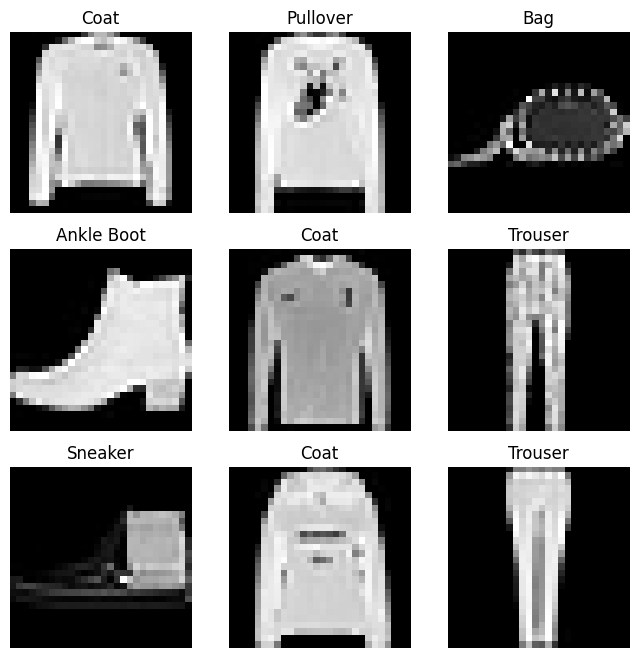

In [14]:
labels_map = {
0: "T-Shirt",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
    print(sample_idx)

    img, label = training_data[sample_idx]
    # print(img)
    
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [15]:
from torch.utils.data import DataLoader


train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


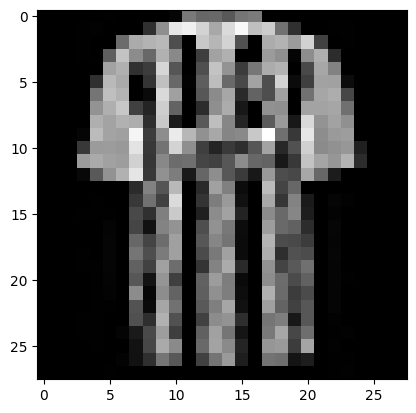

Label: 0


In [16]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [17]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [18]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [19]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [20]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5])


In [21]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [22]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [23]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [24]:
print(f"Before ReLU:\n {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU:\n {hidden1}")

Before ReLU:
 tensor([[ 0.1945, -0.3542, -0.5149, -0.2355, -0.0893,  0.0992, -0.8957, -0.4190,
          0.0679, -0.8067,  0.2825,  0.0048, -0.0659, -0.1888, -0.5336,  0.0435,
         -0.5557,  0.0529, -0.1286,  0.6377],
        [ 0.0492, -0.3308, -0.3319, -0.3241, -0.0140, -0.1374, -0.5022, -0.4714,
         -0.0528, -0.4396,  0.2387, -0.1148,  0.0738, -0.1990, -0.1461,  0.1023,
         -0.2063,  0.0893,  0.0826,  0.6238],
        [ 0.2316, -0.3262, -0.2902, -0.3132, -0.0175,  0.1031, -0.6480, -0.8789,
         -0.2093, -0.6001,  0.1296,  0.0239,  0.1261,  0.0058, -0.1210,  0.1303,
         -0.2490,  0.0736, -0.0364,  0.9979]], grad_fn=<AddmmBackward0>)


After ReLU:
 tensor([[0.1945, 0.0000, 0.0000, 0.0000, 0.0000, 0.0992, 0.0000, 0.0000, 0.0679,
         0.0000, 0.2825, 0.0048, 0.0000, 0.0000, 0.0000, 0.0435, 0.0000, 0.0529,
         0.0000, 0.6377],
        [0.0492, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.2387, 0.0000, 0.0738, 0.0000, 0.